# Life Expectancy & GDP Data Analysis

In [193]:
# import libriaries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline 

In [194]:
# grab and render the dataframe
df = pd.read_csv('all_data.csv')
df.sample(10)

,Country,Year,Life expectancy at birth (years),GDP
29,China,2013,75.6,9.607220e+12
8,Chile,2008,79.6,1.796380e+11
22,China,2006,74.2,2.752130e+12
42,Germany,2010,80.1,3.417090e+12
84,Zimbabwe,2004,44.3,5.805598e+09
26,China,2010,75.0,6.100620e+12
25,China,2009,74.9,5.109950e+12
47,Germany,2015,81.0,3.375610e+12
41,Germany,2009,80.0,3.418010e+12
23,China,2007,74.4,3.552180e+12


In [195]:
# renaming the Life Expectancy column for ease of use.
df.rename(columns={'Life expectancy at birth (years)':'Life_Exp'}, inplace=True)
df.head()

,Country,Year,Life_Exp,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [196]:
# generate a summary statistics
df.describe(include='all')

,Country,Year,Life_Exp,GDP
count,96,96.000000,96.000000,9.600000e+01
unique,6,NaN,NaN,NaN
top,Chile,NaN,NaN,NaN
freq,16,NaN,NaN,NaN
mean,NaN,2007.500000,72.789583,3.880499e+12
std,NaN,4.633971,10.672882,5.197561e+12
min,NaN,2000.000000,44.300000,4.415703e+09
25%,NaN,2003.750000,74.475000,1.733018e+11
50%,NaN,2007.500000,76.750000,1.280220e+12
75%,NaN,2011.250000,78.900000,4.067510e+12


In [197]:
df.Country.unique()

array(['Chile', 'China', 'Germany', 'Mexico', 'United States of America',
       'Zimbabwe'], dtype=object)

The collected data covers the life expectancy and GPD values for a period of 16 years, from 2000 to 2015, for a total a 6 countries, being Chile, China, Germany, Mexico, USA and Zimbabwe.

In [198]:
for i in range(df.Country.nunique()):
    print(f"Statistics for {df.Country.unique()[i]}:")
    # print(df[df.Country == df.Country.unique()[i]].describe())
    # generate the change in % of GDP and Life Exp between 2015 and 2000
    GDP_2015 = df[df.Country == df.Country.unique()[i]].GDP[df.Year == 2015].tolist()[0]
    GDP_2000 = df[df.Country == df.Country.unique()[i]].GDP[df.Year == 2000].tolist()[0]
    GDP_change = GDP_2015 / GDP_2000 - 1
    Life_Exp_2015 = df[df.Country == df.Country.unique()[i]].Life_Exp[df.Year == 2015].tolist()[0] 
    Life_Exp_2000 = df[df.Country == df.Country.unique()[i]].Life_Exp[df.Year == 2000].tolist()[0] 
    Life_Exp_change = Life_Exp_2015 / Life_Exp_2000 - 1
    print(f"GDP for {df.Country.unique()[i]} from 2000 to 2015 {'increased' if GDP_change > 0 else 'decreased'} by {(GDP_change * 100):.1f}%.") 
    print(f"Life Expecatncy for {df.Country.unique()[i]} from 2000 to 2015 {'increased' if Life_Exp_change > 0 else 'decreased'} by {(Life_Exp_change * 100):.1f}%.")
    print('===========================')

Statistics for Chile:
GDP for Chile from 2000 to 2015 increased by 211.5%.
Life Expecatncy for Chile from 2000 to 2015 increased by 4.1%.
Statistics for China:
GDP for China from 2000 to 2015 increased by 813.4%.
Life Expecatncy for China from 2000 to 2015 increased by 6.1%.
Statistics for Germany:
GDP for Germany from 2000 to 2015 increased by 73.1%.
Life Expecatncy for Germany from 2000 to 2015 increased by 3.8%.
Statistics for Mexico:
GDP for Mexico from 2000 to 2015 increased by 68.5%.
Life Expecatncy for Mexico from 2000 to 2015 increased by 2.5%.
Statistics for United States of America:
GDP for United States of America from 2000 to 2015 increased by 75.7%.
Life Expecatncy for United States of America from 2000 to 2015 increased by 3.3%.
Statistics for Zimbabwe:
GDP for Zimbabwe from 2000 to 2015 increased by 143.7%.
Life Expecatncy for Zimbabwe from 2000 to 2015 increased by 32.0%.


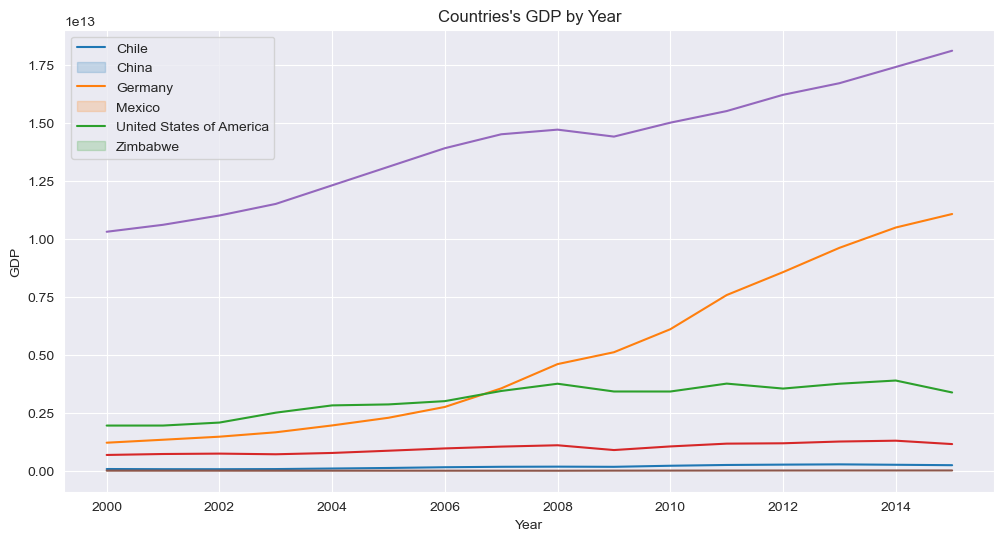

In [204]:
plt.figure(figsize=(12,6)) 
for i in range(df.Country.nunique()):
    plt.title(f"Countries's GDP by Year")
    sns.lineplot(x='Year', y='GDP', data=df[df.Country==df.Country.unique()[i]])
plt.legend(df.Country.unique()); 

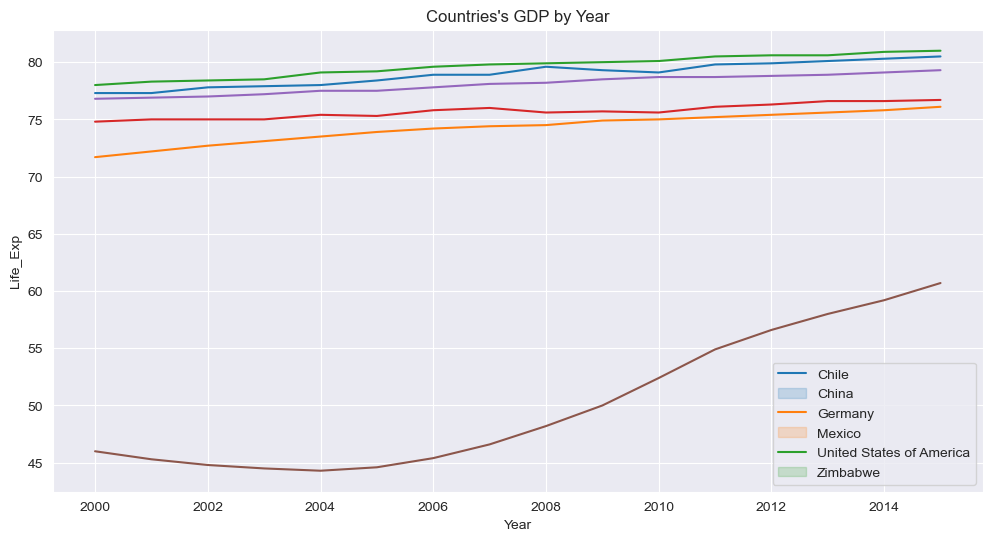

In [205]:
plt.figure(figsize=(12,6)) 
for i in range(df.Country.nunique()):
    sns.lineplot(x='Year', y='Life_Exp', data=df[df.Country==df.Country.unique()[i]])
plt.title("Countries's GDP by Year")
plt.legend(df.Country.unique()); 


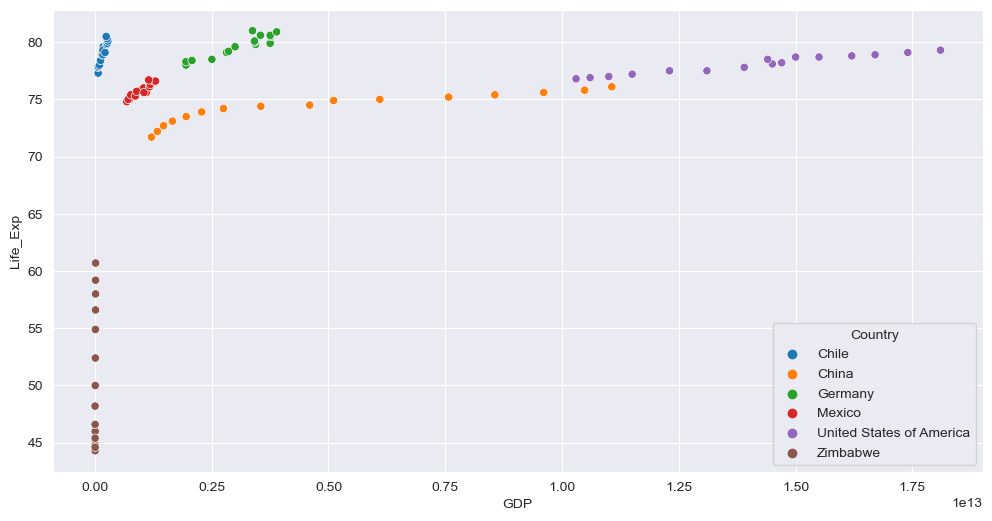

In [214]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='GDP', y='Life_Exp', data=df, hue='Country'); 

Country
Chile                       78.94375
China                       74.26250
Germany                     79.65625
Mexico                      75.71875
United States of America    78.06250
Zimbabwe                    50.09375
Name: Life_Exp, dtype: float64


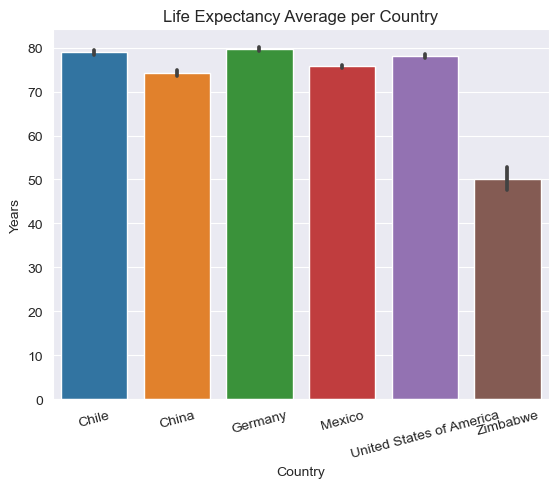

In [210]:
print(df.groupby("Country").Life_Exp.mean())
pivot_tab = df.pivot(index='Year', columns="Country", values='Life_Exp')
sns.barplot(pivot_tab)
plt.title("Life Expectancy Average per Country")
plt.ylabel('Years')
plt.xticks(rotation=15); 


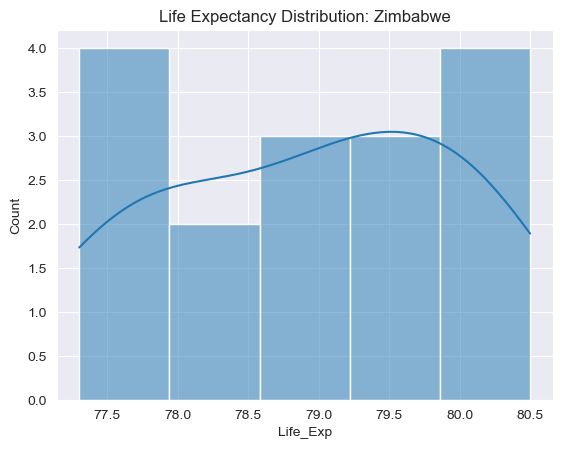

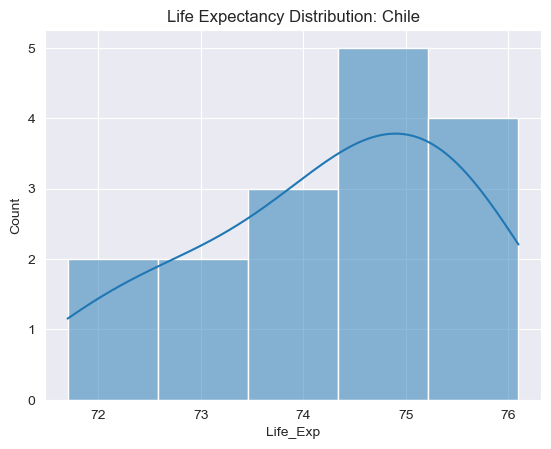

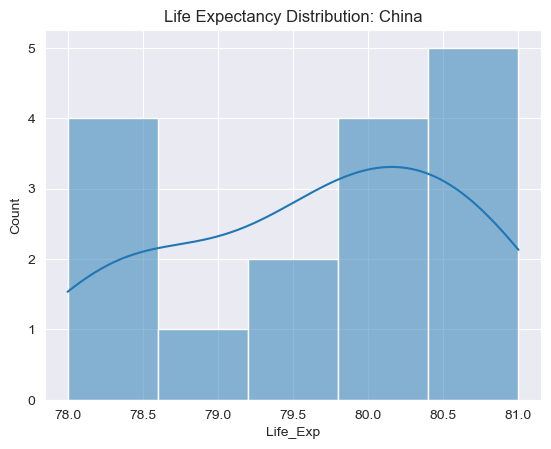

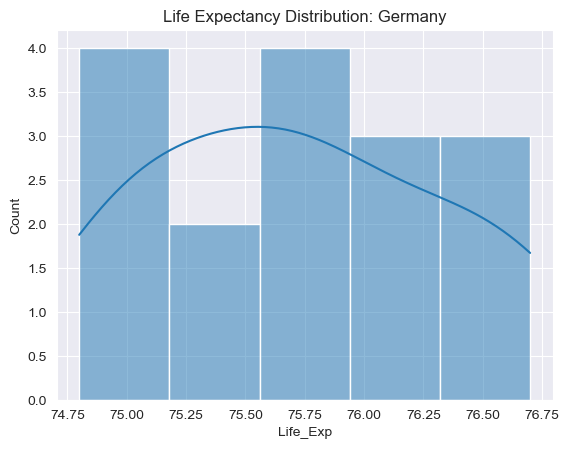

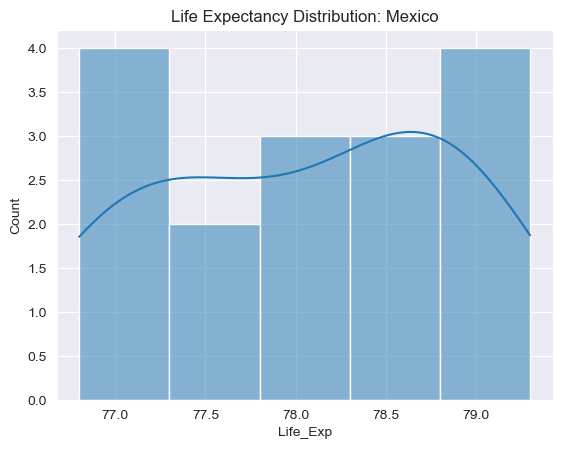

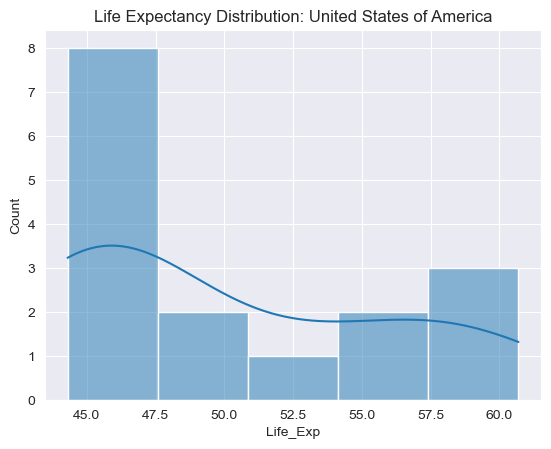

<Figure size 640x480 with 0 Axes>

In [212]:
# plt.figure(figsize=(8,4))
for i in range(df.Country.nunique()):
    plt.title(f"Life Expectancy Distribution: {country}")
    country = df.Country.unique()[i]
    sns.histplot(x='Life_Exp', data=df[df.Country == country], kde=True); 
    plt.show()
    plt.clf(); 
